<h1 style="text-align: center;">openEO: An open earth observation (EO) cloud service <img src="./fig/openeologo.png" style="vertical-align: middle; margin-left: 10px; width: 80px; height: auto;"></h1>

## Introduction

The Copernicus Data Space Ecosystem facilitates cloud processing of Earth Observation (EO) data through its streamlined data access APIs, including the openEO API. The openEO represents an innovative community standard for accessing, processing, and analyzing diverse Earth observation data.

### Why openEO?

Traditionally, EO data processing has been complex and time-consuming, requiring users to discover, download and pre-process large datasets locally. The lack of standardization and interoperability among EO data providers, combined with limited scalable and cost-effective computing resources, has further complicated the process. As a result, researchers often spend considerable time and resources on data preparation and processing, detracting from their focus on data analysis and interpretation.

**Before openEO**
 <div style="flex: 1;align-items: right; max-height: 500px;">
    <img src="./fig/traditional.png" style="height: 400px; width: auto;padding-left: 20px;">
  </div>

Consequently, **cloud-based processing platforms** have emerged as a popular and standard solution.

<div style="display: flex; align-items: stretch;">
  <div style="flex: 3; padding-left: 5px; text-align: left;max-width: 600px;">
    <h2>What is openEO?</h2>

openEO is an **open-source** API for the cloud-based processing of EO data. 

It standardises this traditional EO data processing workflow, providing a **unified** solution to streamline **access, processing, and analysis** of diverse EO datasets using familiar programming languages like Python, etc. Users can effortlessly **share** code, workflows, and data processing algorithms across different platforms and tools, fostering easy **accessibility, scalability, and reproducibility**.

<p><h4>Added Value with openEO</h4>


* **Unified** and **straightforward** access & processing to multiple Earth observation datasets
* **Scalable** processing
* A **standardized** system that makes different platforms​ **Interoperable**
* **Independence** from underlying technologies and software libraries​
* **FAIR** and **open-science** principles

Hence, by adopting openEO, developers, researchers, and data scientists can efficiently use distributed computing environments and cloud-based resources to tackle complex geospatial challenges. 
  </div>
  <div style="flex: 1;align-items: right; max-height: 500px;">
    <img src="./fig/openeo.png" alt="openEO" style="height: 100%; width: auto;padding-left: 100px;">
  </div>
</div>




## Where to start?

For beginners, the openEO API's ["Getting Started"](https://documentation.dataspace.copernicus.eu/APIs/openEO/Python_Client/Python.html) documentation is a good starting point, providing a comprehensive guide and examples to help you get started. 

Advanced users will also find it valuable to explore openEO's capabilities, including its adherence to FAIR principles, open science practices, handling large-scale processing and many more. 


## How to get started with openEO?

openEO can be applied to a wide range of Earth Observation (EO) scenarios, from simple to complex workflows. Every openEO workflow generally involves four steps:

1. Connect to the openEO backend.
2. Discover and load the data collection.
3. Implement the process 
4. Run the workflow

Following these steps, we will demonstrate a simple use case for analysing heatwaves in the Netherlands. Using the openEO API, users can choose JavaScript, Python, or R as their client library. For this example, we will use the Python client library.

Users can choose any Python environment to run this notebook or to use the openEO Python client library. However, the Copernicus Data Space EcoSystem offers a JupyterLab environment that includes the openEO Python Kernel. This environment can be accessed through: https://jupyterhub.dataspace.copernicus.eu/ 

For detailed instructions on using the JupyterLab environment, please refer to the [JupyterLab User Guide](https://documentation.dataspace.copernicus.eu/Applications/JupyterHub.html).


Before starting with the workflow, ensure the necessary libraries, including the openEO client, are installed in the Python environment. If not, install them using:

```python
!pip install openeo
```

Similarly, for R (for more information on R, visit [this link](https://documentation.dataspace.copernicus.eu/APIs/openEO/R_Client/R.html)):

```r
install.packages("openeo")
library(openeo)
```

In [ ]:
# Also make sure to install the following packages if it is not already installed
!pip install folium

## An example using openEO Python Client: Analyse Heatwave in the Netherlands

In [2]:
# Import necessary packages
import openeo
import json
import folium

### Step 1: Connect to the openEO Backend

Using preferred client library, user can access data and processes from multiple backend:

![](./fig/backends.png)

Next, let's set up a connection to an openEO backend using its connection URL. In this notebook, we'll use the Copernicus Data Space Ecosystem, a cloud platform supported by the European Commission, ESA, and Copernicus, therefore the connection url is: https://openeo.dataspace.copernicus.eu/

**Upcoming**:
    
![](./fig/openeofed.png)


url will be https://openeofed.dataspace.copernicus.eu/ 

In [4]:
# let us connect to the cdse backend
connection = openeo.connect(url="openeo.dataspace.copernicus.eu")
connection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

You can find additional information on Authentication in [this page](https://open-eo.github.io/openeo-python-client/auth.html).

To summarize the steps involved compared to the traditional workflow, the following steps are included for this specific use case:

<div style="display: flex; align-items: stretch;">
  <div style="flex: 3; padding-right: 20px; text-align: left;max-width: 600px;">
<p>
    
1. **Load Sentinel 3** from CDSE backend for **area and time of interest**
2. Apply available **processes** or define a new **User-Defined-Functions (UDF)** in the workflow
3. Define openEO **Job configuration** and **Submit** it</p>
  </div>
  <div style="flex: 1;align-items: right; max-height: 300px;">
    <img src="./fig/traditional.png" style="height: 100%; width: auto;padding-left: 20px;">
  </div>
</div>


### Step-2: Discover and load the data collection.

The Earth observation data is organised in so-called collections. You can programmatically list the collections that are available on a back-end and their metadata using methods on the `connection` object. Furthermore, to visualise available collections and metadata in a user-friendly manner, you can also visit the [openEO hub](https://hub.openeo.org/) or explore [backend specific openEO web editor](https://openeo.dataspace.copernicus.eu/).  

Programmatically, use `connection.list_collection_ids()` to list all the collection IDs in the backend, and `connection.describe_collection("SENTINEL3_SLSTR_L2_LST")` to get the metadata for a single collection. Similarly, to grasp the available built-in processes of openEO print `connection.list_processes()` and `connection.describe_process("aggregate_temporal")`.`

For this example, the `SENTINEL3_SLSTR_L2_LST` collection is used. First, define the area of interest and the time range.

In [5]:
# define aoi and temporal extent
def read_json(filename: str) -> dict:
    with open(filename) as input:
        field = json.load(input)
    return field


dates = ["2023-06-01", "2023-10-30"]
aoi = read_json("Netherlands_polygon.geojson")

In [6]:
m = folium.Map([51.5, 5], zoom_start=7)
folium.GeoJson(aoi).add_to(m)
m

In [7]:
# Sentinel 3 from CDSE backend
lst = connection.load_collection(
    "SENTINEL3_SLSTR_L2_LST",
    temporal_extent=dates,
    spatial_extent=aoi,
    bands=["LST"],
)

# load cloud masking
mask = connection.load_collection(
    "SENTINEL3_SLSTR_L2_LST",
    temporal_extent=dates,
    spatial_extent=aoi,
    bands=["confidence_in"],
)

Here, we use the `load_collection` process that loads a collection from the current backend by its id. The collection is loaded as a data cube that is restricted by the parameters spatial_extent, temporal_extent, bands, and properties.

Additionally, by filtering as early as possible (directly in `load_collection()` in this case), we ensure the bak-end only loads the data we are interested in for better performance and to keep the processing costs low

Furthermore, openEO uses the concept of datacubes, which are multidimensional arrays with one or more spatial and/or temporal dimensions. This approach allows flexible representation of datacubes, so users don't have to handle files, formats, data loading, or memory management. For more in-depth information, visit the [EO-College: Cubes and Clouds course(https://eo-college.org/courses/cubes-and-clouds/).ion.

In this example, we load two seperate datacubes: lst and mask. The mask layer is later used to mask out the low-quality or unreliable data from the lst lay

Find out more about data discovery, loading and filtering at [Finding and loading data](https://open-eo.github.io/openeo-python-client/data_access.html).er. 

### Step-3: Implement your process

In [14]:
mask = mask >= 16384

lst_masked = lst.mask(mask).aggregate_temporal_period(period="day", reducer="max")
lst_masked

Next, we define a User Defined Function (UDF) that takes in the datacube and checks whether both the conditions are satisfied:
* temperature above 295 Kelvin for atleast 5 days
* temperature above 295-300 Kelvin continues for atleast 3 days

If the values meet the designated threshold and continue for more than two days, a new resulting array is generated and returned.

Please note that, here we gave 295 and 300 Kelvin as two thresholds since we chose a relatively small region. You can change match your requirement. 

In [15]:
# user-defined functions in openEO
# this can also be included in a seperate file: `udf = openeo.UDF.from_file("user_defined_function.py")`
udf = openeo.UDF(
    """
import xarray
from openeo.udf import inspect

def apply_datacube(cube: xarray.DataArray, context: dict) -> xarray.DataArray:
    
    condition_all_above_295 = (cube > 295).rolling(t=5).construct('window_dim').all(dim='window_dim')
    
    condition_at_least_3_above_300 = (cube > 300).rolling(t=5).construct('window_dim').sum(dim='window_dim') >= 3
    
    result = condition_all_above_295 & condition_at_least_3_above_300
    
    return result
"""
)

In [16]:
heatwave_loc = lst_masked.apply_dimension(process=udf, dimension="t")

Following the conditional check with our `UDF`, let us use `sum` as the reducer to count the total number of times each pixels had a heat wave in the Netherlands during June-September 2023.

In [17]:
heatwave_loc = heatwave_loc.reduce_dimension(reducer="sum", dimension="t")

Please note that while this looks like an operation going so quick, there is no real data processing going so far. The **heatwave_loc** object, at this point, is just an abstract representation of our algorithm under construction.

As an illustration of this, you can also have look at the JSON representation of the algorithm so far, by simply printing them as json: `print(heatwave_loc.to_json())`

#### Step-4: Run the workflow

Finally, to trigger an actual execution (on the backend), we have to explicitly send the above representation to the backend. You can do this either synchronously(simple download) or using the batch-job-based method. Most of the simple, basic openEO usage examples show synchronous downloading of results. Synchronous downloads are handy for quick experimentation on small data cubes.

This only works properly if the processing doesn’t take too long and is focused on a smaller area of interest. However, you have to use batch jobs for the heavier work (larger regions of interest, larger time series, more intensive processingile.

Since the workflow covers an entire country, the processing might be time intensive. Therefore, we can use the job configuration capabilities provided in openEO to execute the workflow when using batch job-based methods.

You can find more information on Job configuration on [this page](https://documentation.dataspace.copernicus.eu/APIs/openEO/job_config.html).

In [18]:
# job configuration

job_options = {
    "executor-memory": "2G",
    "executor-memoryOverhead": "3G",
    "executor-cores": "2",
}

Depending on the datacube that is created by the process graph and the use case, we can export the results to more suitable formats supported by openEO. Explore the supported file formats in [this page](https://documentation.dataspace.copernicus.eu/APIs/openEO/File_formats.html).

Here, let’s download this as NetCDFFF file. 

In [19]:
# running a batch job

heatwave_job = heatwave_loc.execute_batch(
    title="Total Heatwave Days in the Netherlands",
    outputfile="Heatwave_NL.nc",
    job_options=job_options,
)

0:00:00 Job 'j-240726f2f563448da7877b90aba566d2': send 'start'
0:00:20 Job 'j-240726f2f563448da7877b90aba566d2': created (progress 0%)
0:00:25 Job 'j-240726f2f563448da7877b90aba566d2': created (progress 0%)
0:00:32 Job 'j-240726f2f563448da7877b90aba566d2': created (progress 0%)
0:00:40 Job 'j-240726f2f563448da7877b90aba566d2': created (progress 0%)
0:00:50 Job 'j-240726f2f563448da7877b90aba566d2': created (progress 0%)
0:01:03 Job 'j-240726f2f563448da7877b90aba566d2': created (progress 0%)
0:01:21 Job 'j-240726f2f563448da7877b90aba566d2': running (progress N/A)
0:01:43 Job 'j-240726f2f563448da7877b90aba566d2': running (progress N/A)
0:02:09 Job 'j-240726f2f563448da7877b90aba566d2': running (progress N/A)
0:02:39 Job 'j-240726f2f563448da7877b90aba566d2': running (progress N/A)
0:03:16 Job 'j-240726f2f563448da7877b90aba566d2': running (progress N/A)
0:04:03 Job 'j-240726f2f563448da7877b90aba566d2': running (progress N/A)
0:05:09 Job 'j-240726f2f563448da7877b90aba566d2': finished (progres

### openEO Web-editor

Though this documentation mainly discusses how to programmatically create and interact with batch jobs using the openEO Python client library. Users can also use the web-based interactive environment to manage and monitor their batch jobs; feel free to switch to an openEO web editor like openeo.dataspace.copernicus.eu/ at any time. After logging in with the same account, the batch jobs should be listed under the “Data Processing” tab. More information on using the openEO web editor is discussed [here](https://documentation.dataspace.copernicus.eu/Applications/WebEditor.html).

![](./fig/web_editor.png)


To summarise key features of openEO web-editor:

 the openEO Web Editor can act as a simple interface for:

Data Discovery: User can explore and discover available Earth observation datasets.
Workflow Creation: User can create an openEO processing workflow from basic building blocks in a drag-and-drop interface.
Workflow Execution: Once User have defined their processing workflow and configured the parameters, User can execute the workflow using the Web Editor.
Result Visualization: User can explore the output data on interactive maps, generate charts and graphs
Job Management: The Web Editor allows you to monitor your processing jobs, view job histories, and access the generated results.

### Let us visualise the result

In [20]:
import matplotlib
import xarray as xr
import numpy as np

In [21]:
heatwave = xr.load_dataset("Heatwave_NL.nc")

In [22]:
data = heatwave[["LST"]].to_array(dim="bands")[0]
data.values[data == 0] = np.nan

In [23]:
lon, lat = np.meshgrid(
    data.x.values.astype(np.float64), data.y.values.astype(np.float64)
)
cm = matplotlib.colormaps.get_cmap("hot_r")
colored_data = cm(data / 20)


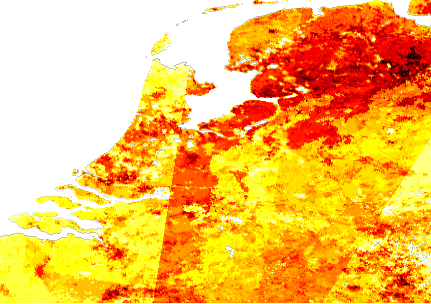

In [24]:
m = folium.Map(location=[lat.mean(), lon.mean()], zoom_start=8)
folium.raster_layers.ImageOverlay(
    colored_data,
    [[lat.min(), lon.min()], [lat.max(), lon.max()]],
    mercator_project=True,
    opacity=0.5,
).add_to(m)
m

## Credit cost

In [25]:
print(
    f" The total openEO credits consumed when executing heatwave workflow is {heatwave_job.describe()['costs']} credits."
)

 The total openEO credits consumed when executing heatwave workflow is 4 credits.


**4000** credits are freely allocated for research purposes to all users, and these credits are replenished monthly.

However, please note that the cost mentioned above was **incurred during the preparation of this notebook and could change over time**.

## openEO Algorithm Plaza: Reusability

Often, users have specific (sub)graphs that reoccur in the same process graph or even in different process graphs or algorithms. openEO facilitates the reusability and reproducibility by allowing to store and share such graphs as **User-Defined Processes (UDPs)**.

The openEO Algorithm Plaza is such platform where users can **find, share, and use** the algorithms(UDPs) developed for Earth Observation (EO) applicationss. It acts as a one-stop-shop of **ready-to-use algorithms** promoting the **reuse of existing solutions**. 

The platform ensures **standardization and compatibility with the openEO API**, provides documentation and examples for each algorithm, and fosters **collaboration and knowledge sharing** in the EO field.

While the example below, shows on save the workflow just created, it is not an ideal example. It is recommended to define a few parameters, such as the input for the area of interest (AOI) and the time extent.


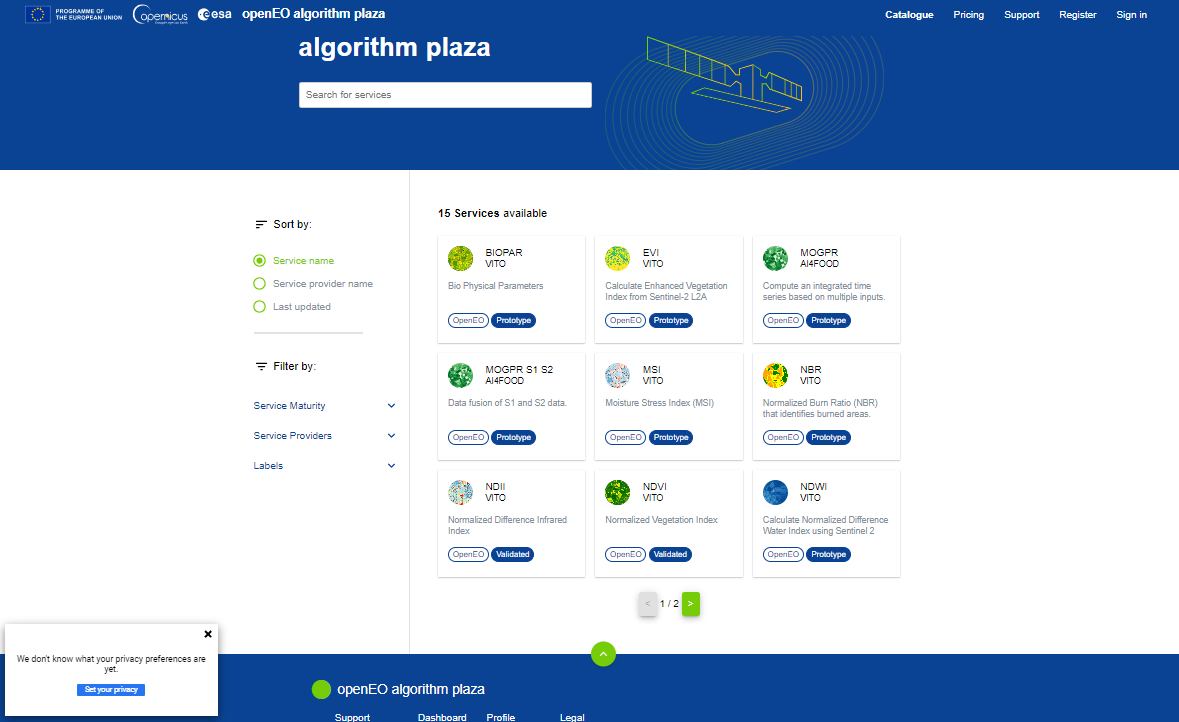


For more information on using and sharing the EO algorithms to/from openEO Algorithm Plaza, visit [this page](https://documentation.dataspace.copernicus.eu/Applications/AlgorithmPlaza.html).